# Wstęp do uczenia maszynowego - projekt 2
## Kamień milowy 1
#### Michał Tomczyk, Mikołaj Piórczyński, grupa 3

Zbiór na którym będziemy działać przedstawia informacje dotyczące danych przeglądania użytkowników sklepu internetowego oferującego ubrania dla kobiet w ciąży. Dane zostały zebrane na przestrzeni pięciu miesięcy w 2008 roku i zawierają m.in. kategorię produktu, lokalizację zdjęcia na stronie, kraj pochodzenia adresu IP oraz cenę produktu w dolarach amerykańskich.

Dane: https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Wczytanie danych i wstępne informacje

In [2]:
df = pd.read_csv("../data/e-shop clothing 2008.csv", sep=";")
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [3]:
df.shape

(165474, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

## Zmienne

`year` - 2008 rok  
`month` - miesiąc, od kwietnia (4) do sierpnia (8) 
`day` - dzień miesiąca  
`order` - kolejność w sekwencji kliknięć podczas jednej sesji  
`country` - kraj pochodzenia adresu IP  
`sessionID` - identyfikator sesji
`page1(maincategory)` - główna kategoria produktu (spodnie, spódnice, bluzki, wyprzedaż)  
`page2(clothingmodel)` - kod produktu  
`colour` - kolor produktu  
`location` - lokalizację zdjęcia produktu na stronie     
`modelphotography` - fotografia modelki (en face, z profilu)  
`price` - cena w $   
`price2` - czy cena danego produktu jest wyższa niż średnia cena dla całej kategorii produktów   
`page` - numer strony w witrynie sklepu internetowego (1-5)  

Sprawdźmy ile unikalnych wartości zawiera każda z kolumn.

In [5]:
df.nunique()

year                           1
month                          5
day                           31
order                        195
country                       47
session ID                 24026
page 1 (main category)         4
page 2 (clothing model)      217
colour                        14
location                       6
model photography              2
price                         20
price 2                        2
page                           5
dtype: int64

## Braki danych

Według opisu zbioru danych braki nie mają specjalnej reprezentacji (są oznaczane po prosu jako N/A). Sprawdźmy czy występują w naszym zbiorze.

In [6]:
df.isna().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

Braki danych nie występują w naszym zbiorze.

W zbiorze danych występuje 14 zmiennych, przy czy 11 z nich jest kategorycznych. Zostały one już zakodowane, a przypsiane kody  zawarte w oddzielnym pliku. W celu łatwiejszej eksploracji dancyh odkodujemy zmienne kategorycze zgodnie z przypisanymi wartościami.

In [7]:
country_dict = {
    1:"Australia",
    2:"Austria",
    3:"Belgium",
    4:"British Virgin Islands",
    5:"Cayman Islands",
    6:"Christmas Island",
    7:"Croatia",
    8:"Cyprus",
    9:"Czech Republic",
    10:"Denmark",
    11:"Estonia",
    12:"unidentified",
    13:"Faroe Islands",
    14:"Finland",
    15:"France",
    16:"Germany",
    17:"Greece",
    18:"Hungary",
    19:"Iceland",
    20:"India",
    21:"Ireland",
    22:"Italy",
    23:"Latvia",
    24:"Lithuania",
    25:"Luxembourg",
    26:"Mexico",
    27:"Netherlands",
    28:"Norway",
    29:"Poland",
    30:"Portugal",
    31:"Romania",
    32:"Russia",
    33:"San Marino",
    34:"Slovakia",
    35:"Slovenia",
    36:"Spain",
    37:"Sweden",
    38:"Switzerland",
    39:"Ukraine",
    40:"United Arab Emirates",
    41:"United Kingdom",
    42:"USA",
    43:"biz (*.biz)",
    44:"com (*.com)",
    45:"int (*.int)",
    46:"net (*.net)",
    47:"org (*.org)"
}

category_dict = {
    1:"trousers",
    2:"skirts",
    3:"blouses",
    4:"sale"
}

colors_dict = {
    1:"beige",
    2:"black",
    3:"blue",
    4:"brown",
    5:"burgundy",
    6:"gray",
    7:"green",
    8:"navy blue",
    9:"of many colors",
    10:"olive",
    11:"pink",
    12:"red",
    13:"violet",
    14:"white"
}

location_dict = {
    1:"top left",
    2:"top in the middle",
    3:"top right",
    4:"bottom left",
    5:"bottom in the middle",
    6:"bottom right"
}

model_dict = {
    1:"en face",
    2:"profile"
}

higher_than_category_price_dict = {
    1:"yes",
    2:"no"
}

In [8]:
df["country"] = df["country"].map(country_dict)
df["page 1 (main category)"] = df["page 1 (main category)"].map(category_dict)
df["colour"] = df["colour"].map(colors_dict)
df["location"] = df["location"].map(location_dict)
df["model photography"] = df["model photography"].map(model_dict)
df["price 2"] = df["price 2"].map(higher_than_category_price_dict)

## EDA

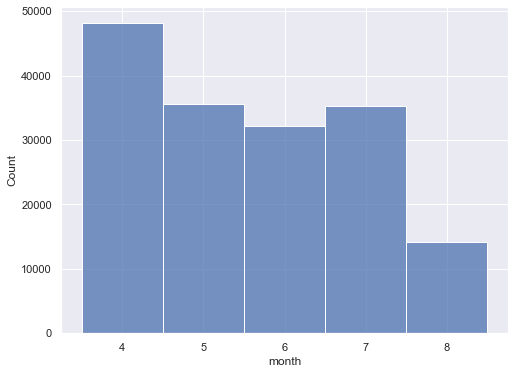

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='month', bins=5, discrete=True)
plt.show()

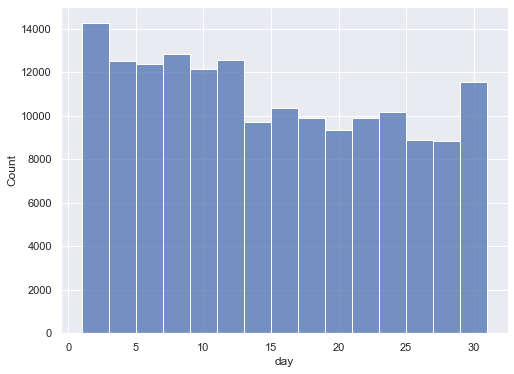

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='day', bins=15)
plt.show()

In [11]:
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

In [12]:
idx_to_day = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
df["weekday"] = df["date"].dt.dayofweek.map(idx_to_day)

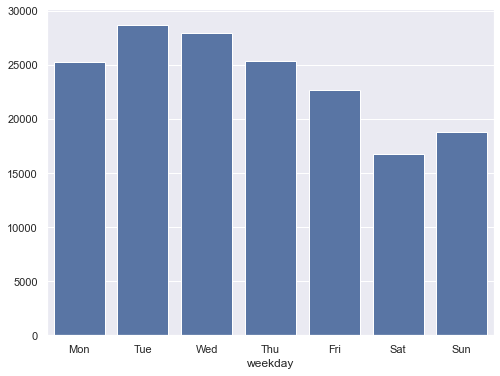

In [40]:
data_to_plot = df.groupby("weekday").size()
plt.figure(figsize=(8, 6))
sns.barplot(x=data_to_plot.index, y=data_to_plot.values, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], color="b")
plt.show()

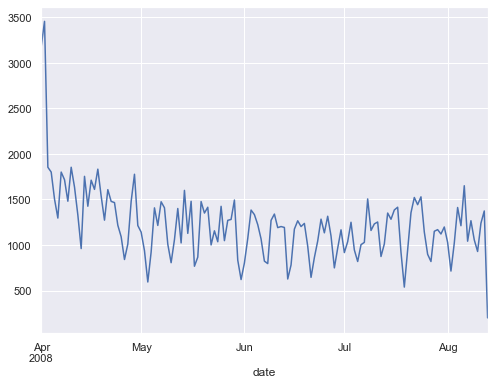

In [12]:
plt.figure(figsize=(8, 6))
df.groupby("date").size().plot()
plt.show()

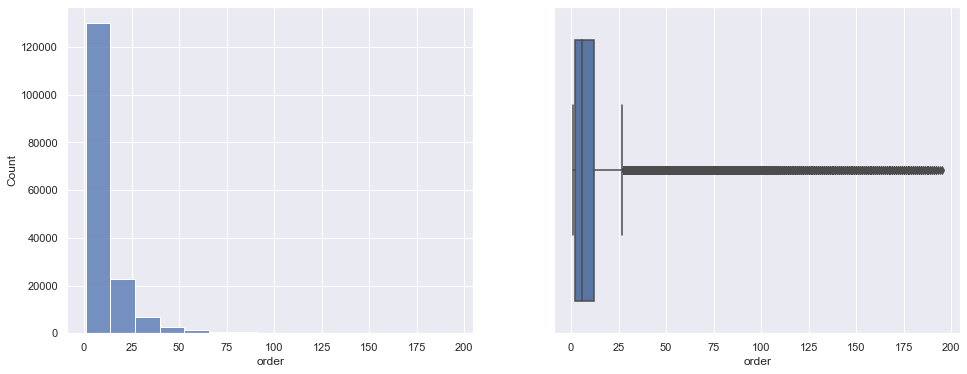

In [13]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(df, x='order', bins=15)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['order'])

plt.show()

In [14]:
len(df[df['order']>25])

13275

Znaczna większość wartości z kolumny `order`mieści się w przedziale 1-25. Jest jednak też bardzo dużo outlierów (aż ponad 13000 przy 165000 rekordów).

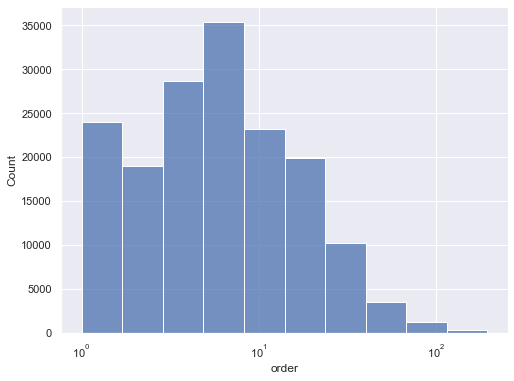

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='order', bins=10, log_scale=True)
plt.show()

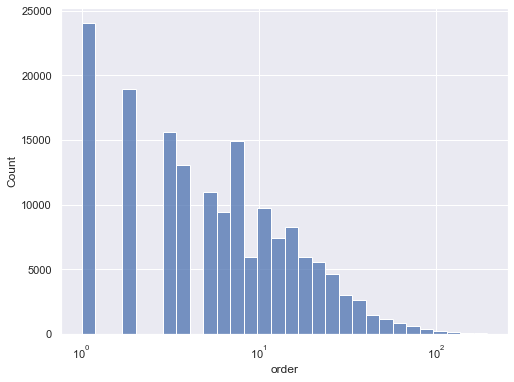

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='order', bins=30, log_scale=True)
plt.show()

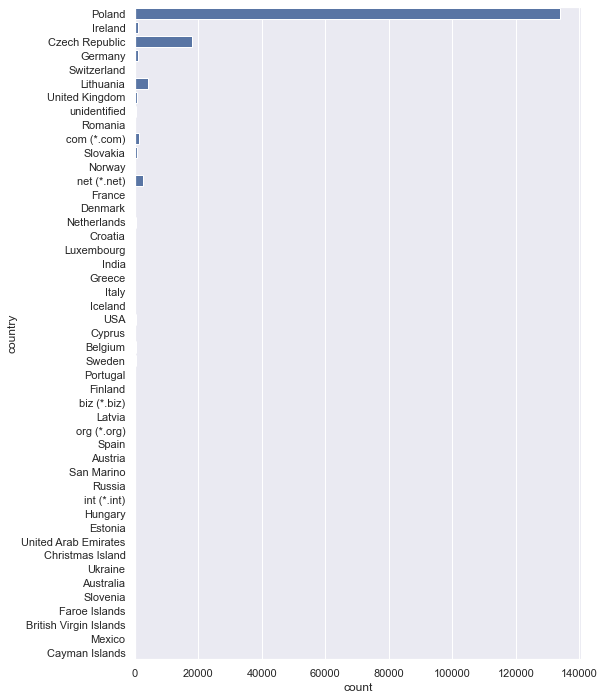

In [17]:
plt.figure(figsize=(8, 12))
sns.countplot(data=df, y='country', color='b')
plt.show()

In [18]:
countries_summary = df.groupby(['country']).size()
countries_summary[countries_summary > 1000]

country
Czech Republic     18003
Lithuania           4091
Poland            133963
com (*.com)         1385
net (*.net)         2522
dtype: int64

Zdecydowanie najliczniejszą reprezantację wśród państw (aż około 80%) Polska. Często występują także Czechy. Oprócz tego po ponad 1000 wejść na stronę jest z Litwy, a także domen .com i .net

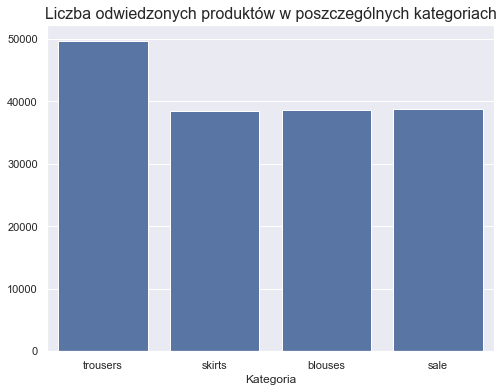

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='page 1 (main category)', color="b")
plt.title("Liczba odwiedzonych produktów w poszczególnych kategoriach", fontsize=16)
plt.xlabel("Kategoria")
plt.ylabel("")
plt.show()

trousers:  43
skirts:  34
blouses:  59
sale:  82


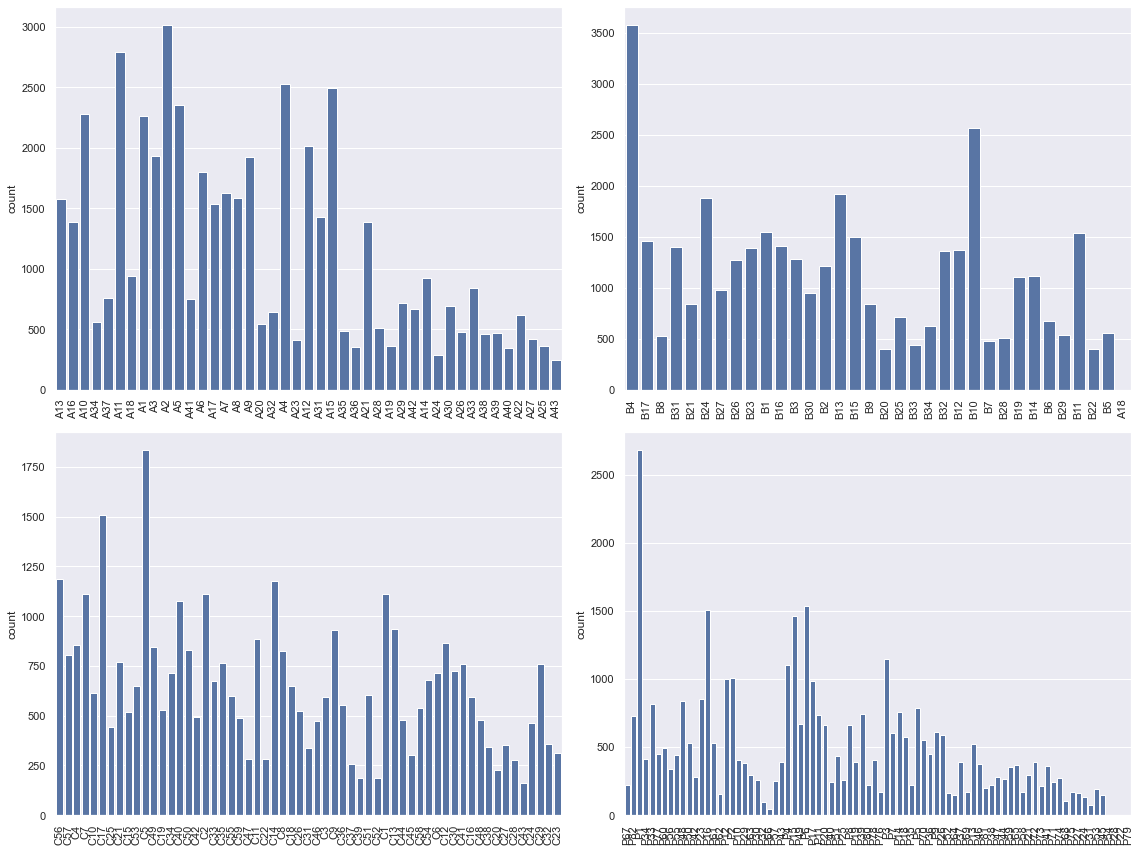

In [11]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
data_to_plot = df[df["page 1 (main category)"] == "trousers"]["page 2 (clothing model)"]
print("trousers: ", data_to_plot.nunique())
sns.countplot(x=data_to_plot.values, color='b')
plt.xticks(rotation=90)


plt.subplot(2, 2, 2)
data_to_plot = df[df["page 1 (main category)"] == "skirts"]["page 2 (clothing model)"]
sns.countplot(x=data_to_plot.values, color='b')
print("skirts: ", data_to_plot.nunique())
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
data_to_plot = df[df["page 1 (main category)"] == "blouses"]["page 2 (clothing model)"]
sns.countplot(x=data_to_plot.values, color='b')
print("blouses: ", data_to_plot.nunique())
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
data_to_plot = df[df["page 1 (main category)"] == "sale"]["page 2 (clothing model)"]
sns.countplot(x=data_to_plot.values, color='b')
print("sale: ", data_to_plot.nunique())
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Sprawdźmy rozkłady ceny produktów w poszczególnych głównych kategoriach.

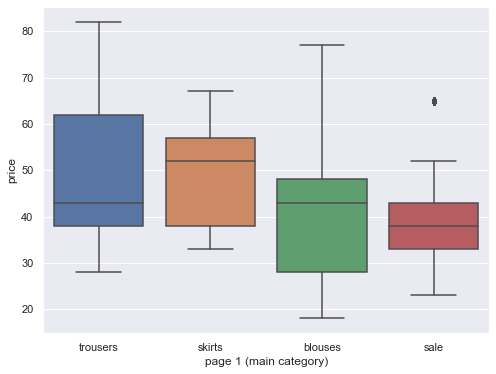

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="page 1 (main category)", y="price")
plt.show()

In [15]:
df["price"].groupby(df["page 1 (main category)"]).mean()

page 1 (main category)
blouses     40.291728
sale        36.233799
skirts      51.192434
trousers    46.714889
Name: price, dtype: float64

Widzimy, że spódnice średnio są najdroższe, natomiast produkty przecenione najtańsze. 

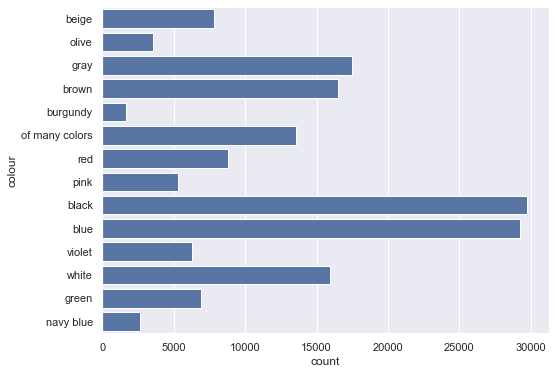

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='colour', color="b")
plt.show()

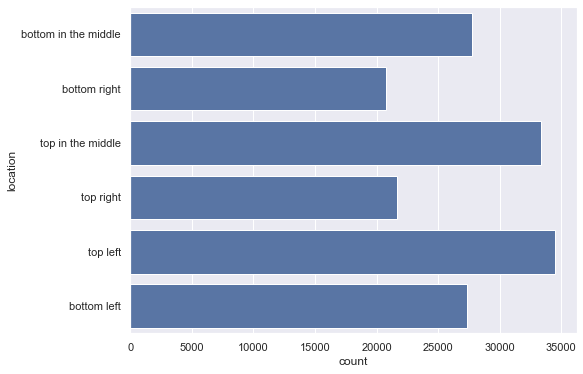

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='location', color="b")
plt.show()

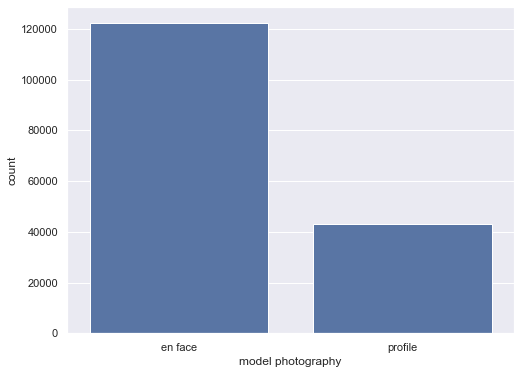

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='model photography', color='b')
plt.show()

In [24]:
len(df[df['model photography'] == 'en face']) / len(df)

0.7399289314333369

74% rekordów dotyczy przedmiotów posiadających fotografię z przodu, dla reszty zdjęcie jest z profilu.

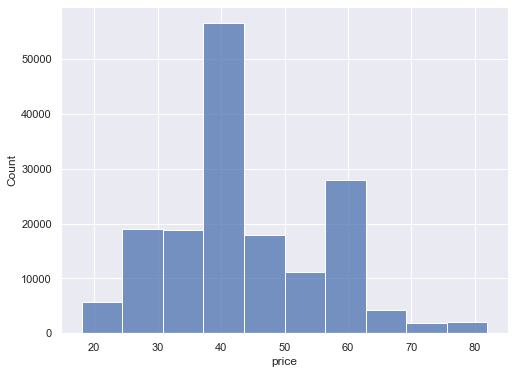

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='price', bins=10)
plt.show()

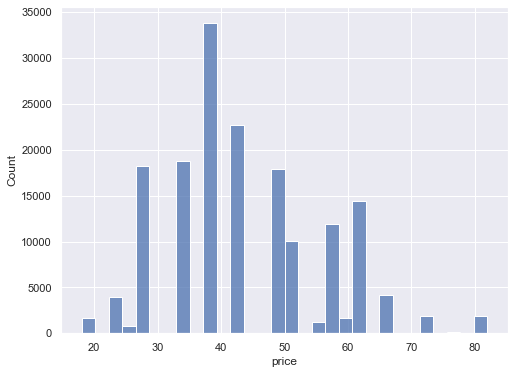

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='price', bins=30)
plt.show()

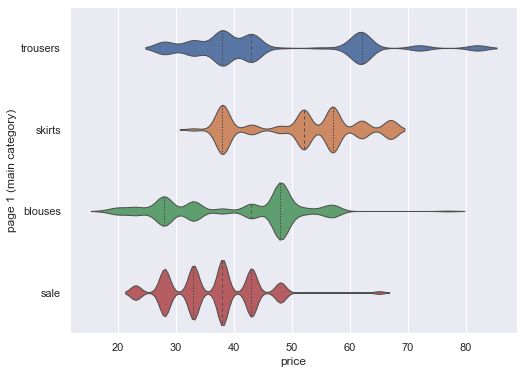

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, y="page 1 (main category)", x="price", split=True, inner="quart", linewidth=1)
plt.show()

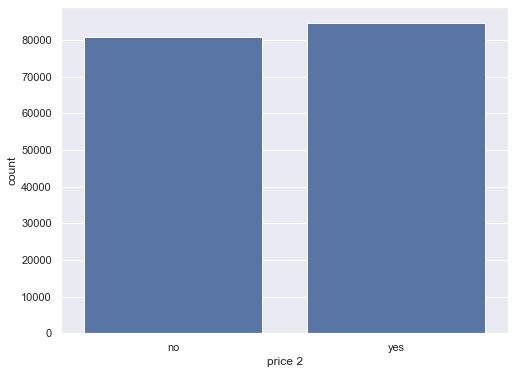

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='price 2', color='b')
plt.show()

`price 2` określa czy dany produkt, którego dotyczy wejście na stronę ma cenę wyższą niż średnia cena produktów w danej kategorii.

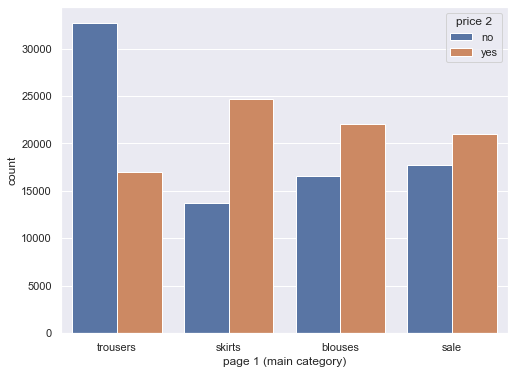

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='page 1 (main category)', hue='price 2')
plt.show()

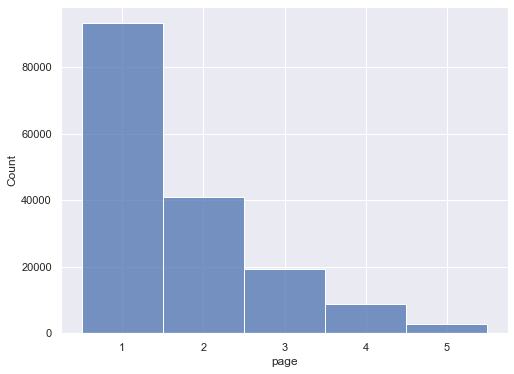

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='page', bins=5, discrete=True)
plt.show()

Znaczna ilość kliknięć dotyczy produktów znajdujących się na pierwszej stronie serwisu.

# Użytkownicy

In [30]:
# liczba sesji / klientów / użytkowników sklepu
df["session ID"].nunique()

24026

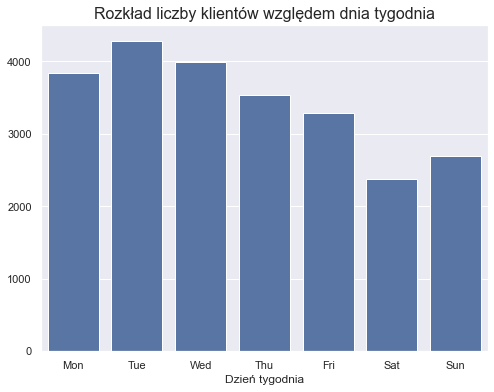

In [19]:
data_to_plot = df.groupby(["weekday", "session ID"]).size().reset_index().groupby(["weekday"]).size()
plt.figure(figsize=(8, 6))
sns.barplot(x=data_to_plot.index, y=data_to_plot.values, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], color="b")
plt.title("Rozkład liczby klientów względem dnia tygodnia", fontsize=16)
plt.xlabel("Dzień tygodnia")
plt.show()

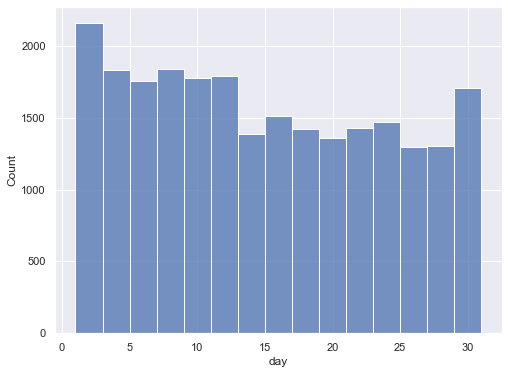

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df.groupby(["day", "session ID"]).size().reset_index()['day'], bins=15)
plt.show()

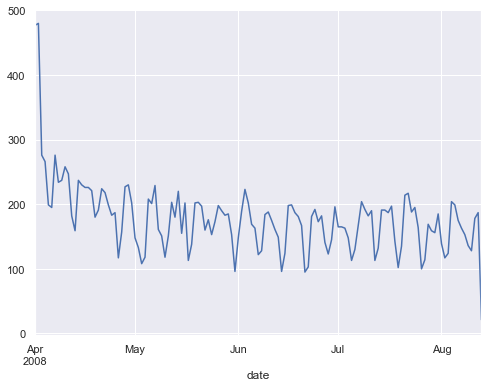

In [31]:
plt.figure(figsize=(8, 6))
df.groupby(["date", "session ID"]).size().reset_index().groupby(["date"]).size().plot()
plt.show()

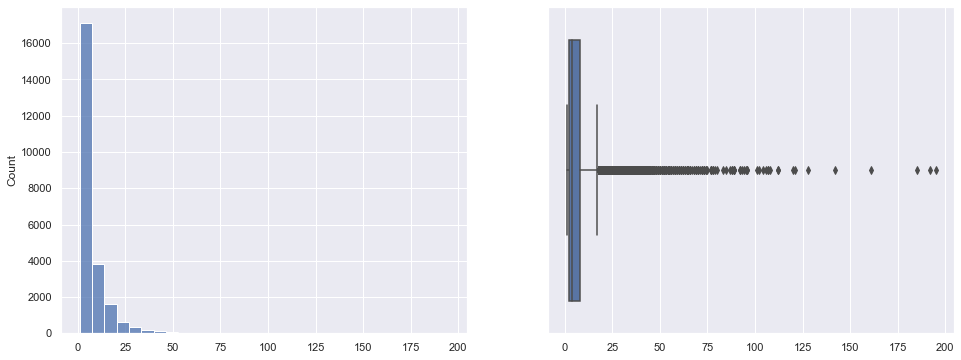

In [32]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(x=df.groupby(["session ID"]).size(), bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(x=df.groupby(["session ID"]).size())
plt.show()

In [33]:
# średnia liczba odwiedzonych stron przez jednego klienta
df.shape[0]  / df["session ID"].nunique()

6.8872887704986265

In [34]:
df.groupby(["session ID"]).size().median()

4.0

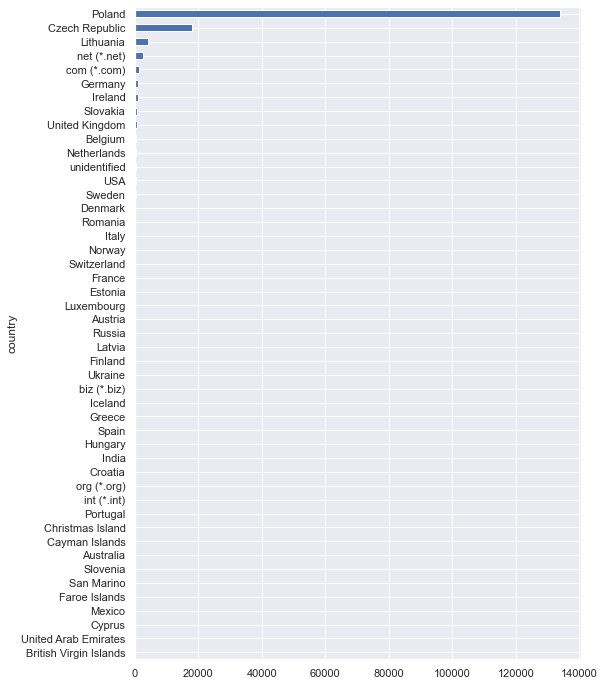

In [35]:
data_to_plot = df[["session ID", "country"]].groupby(["session ID", "country"]).size().groupby("country").sum().sort_values()
plt.figure(figsize=(8, 12))
data_to_plot.plot(kind="barh")
plt.show()

In [36]:
data_to_plot[data_to_plot > 1000]

country
com (*.com)         1385
net (*.net)         2522
Lithuania           4091
Czech Republic     18003
Poland            133963
dtype: int64

In [37]:
data_to_plot.describe()

count        47.000000
mean       3520.723404
std       19624.364534
min           1.000000
25%           6.500000
50%          49.000000
75%         190.000000
max      133963.000000
dtype: float64

In [38]:
len(data_to_plot[data_to_plot < 10])

14

In [39]:
len(data_to_plot[data_to_plot < 10]) / len(data_to_plot)

0.2978723404255319

## Korelacje między zmiennymi

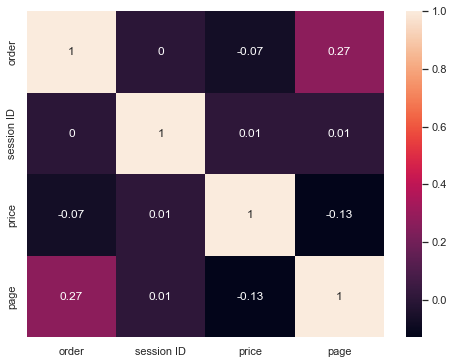

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["order", "session ID", "price", "page"]].corr('spearman').round(2), annot=True)
plt.show()

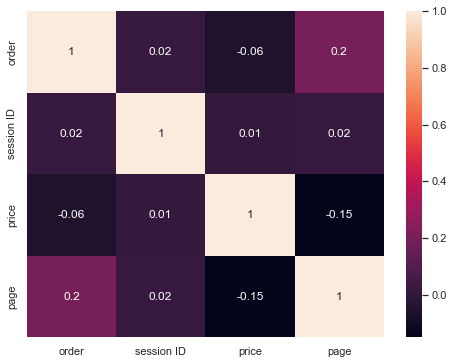

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["order", "session ID", "price", "page"]].corr('pearson').round(2), annot=True)
plt.show()

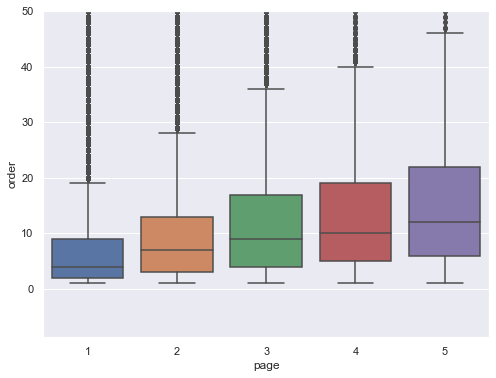

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="page", y="order")
plt.ylim(top=50)
plt.show()

## Preprocessing

Dane będziemy klasteryzować nie z punktu widzenia pojedynczych kliknięć, a poszczególnych sesji, skupionych wokół jednego `session ID` - będziemy klasteryzować klientów sklepu. Z tego powodu należy zagregować dane, grupując je według tej zmiennej. Niektóre z nich, jak np. data czy kraj, dla każdego ID sesji przyjmują tylko jedną wartość. Zmienna `order` staje się niepotrzebna, możemy ją zastąpić maksymalną wartością, czyli sumą kliknięć w sesji, a `price` informacją o minimalnej, średniej i maksymalnej cenie przeglądanych produktów w sesji. `model photography` oraz `price 2` możemy zastąpić sumą zdjęć od przodu oraz cen wyższych niż średnia cena. Zmienną `page 1 (main category)` zakodowaliśmy metodą OneHot i dla każdego `session ID` policzyliśmy sumę wartości w poszczególnych kategoriach. 

In [43]:
df = pd.read_csv("data/e-shop clothing 2008.csv", sep=";")

In [44]:
df.drop(columns=['year', 'month', 'day'], inplace=True)

In [45]:
df['price 2'] = df['price 2'].apply(lambda x: 0 if x==2 else 1)
df['model photography'] = df['model photography'].apply(lambda x: 0 if x==1 else 1)
df = pd.get_dummies(data=df, columns=['page 1 (main category)'])

In [46]:
df1 = df.groupby('session ID').aggregate(
    number_of_clicks = ('order', 'max'),
    price_min = ('price', 'min'),
    price_mean = ('price', 'mean'),
    price_max = ('price', 'max'),
    price_2_sum = ('price 2', 'sum'),
    cat1_sum = ('page 1 (main category)_1','sum'),
    cat2_sum = ('page 1 (main category)_2','sum'),
    cat3_sum = ('page 1 (main category)_3','sum'),
    cat4_sum = ('page 1 (main category)_4','sum'),
    country = ('country', 'max'),
    colour_mode = ('colour', pd.Series.mode),
    model_photography_sum = ('model photography', 'sum'),
    page_mode =  ('page', pd.Series.mode),
    page_max = ('page', 'max')
)


In [47]:
df1

,number_of_clicks,price_min,price_mean,price_max,price_2_sum,cat1_sum,cat2_sum,cat3_sum,cat4_sum,country,colour_mode,model_photography_sum,page_mode,page_max
session ID,,,,,,,,,,,,,,
1,9,28,42.111111,57,5,2,3,2,2,29,6,5,1,5
2,10,38,50.000000,67,8,2,5,0,3,29,"[3, 9]",1,2,2
3,6,28,42.166667,48,4,0,1,4,1,21,"[4, 6, 7, 9, 13, 14]",2,1,5
4,4,33,45.250000,62,2,2,0,2,0,21,2,0,2,3
5,1,57,57.000000,57,1,0,0,1,0,9,14,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24022,3,28,29.666667,33,0,3,0,0,0,29,"[1, 8, 14]",1,1,1
24023,7,28,35.142857,38,2,4,0,0,3,29,4,2,1,1
24024,1,67,67.000000,67,1,0,1,0,0,29,2,0,1,1


In [48]:
df1["colour_mode"].apply(lambda x: isinstance(x, np.ndarray)).sum()

7229

In [49]:
def select_random_value(x):
    if isinstance(x, np.ndarray):
        return np.random.choice(x, 1)[0]
    
    else:
        return x

In [50]:
def count_values(x):
    if isinstance(x, np.ndarray):
        return len(x)
    
    else:
        return 1

In [51]:
df1["colour_mode_random"] = df1["colour_mode"].apply(select_random_value)

<AxesSubplot:>

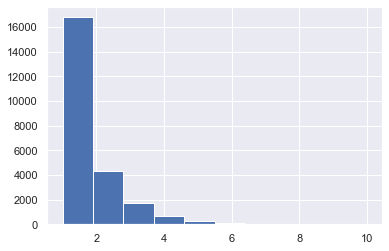

In [52]:
df1["colour_mode"].apply(count_values).hist()

In [53]:
df1["colour_mode_count"] = df1["colour_mode"].apply(count_values)

In [54]:
df1.drop(columns=["colour_mode"], inplace=True)

Wybieramy jeden z ulubionych kolorów i dodajemy zmienną określającą liczbę ulubionych kolorów 

In [55]:
df1["page_mode"].apply(lambda x: isinstance(x, np.ndarray)).sum()

2630

In [56]:
df1["page_mode"] = df1["page_mode"].apply(count_values)

In [57]:
df1["country"] = df1["country"].apply(lambda x: 0 if x == 29 else 1)

In [58]:
df1

,number_of_clicks,price_min,price_mean,price_max,price_2_sum,cat1_sum,cat2_sum,cat3_sum,cat4_sum,country,model_photography_sum,page_mode,page_max,colour_mode_random,colour_mode_count
session ID,,,,,,,,,,,,,,,
1,9,28,42.111111,57,5,2,3,2,2,0,5,1,5,6,1
2,10,38,50.000000,67,8,2,5,0,3,0,1,1,2,9,2
3,6,28,42.166667,48,4,0,1,4,1,1,2,1,5,14,6
4,4,33,45.250000,62,2,2,0,2,0,1,0,1,3,2,1
5,1,57,57.000000,57,1,0,0,1,0,1,0,1,2,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24022,3,28,29.666667,33,0,3,0,0,0,0,1,1,1,8,3
24023,7,28,35.142857,38,2,4,0,0,3,0,2,1,1,4,1
24024,1,67,67.000000,67,1,0,1,0,0,0,0,1,1,2,1


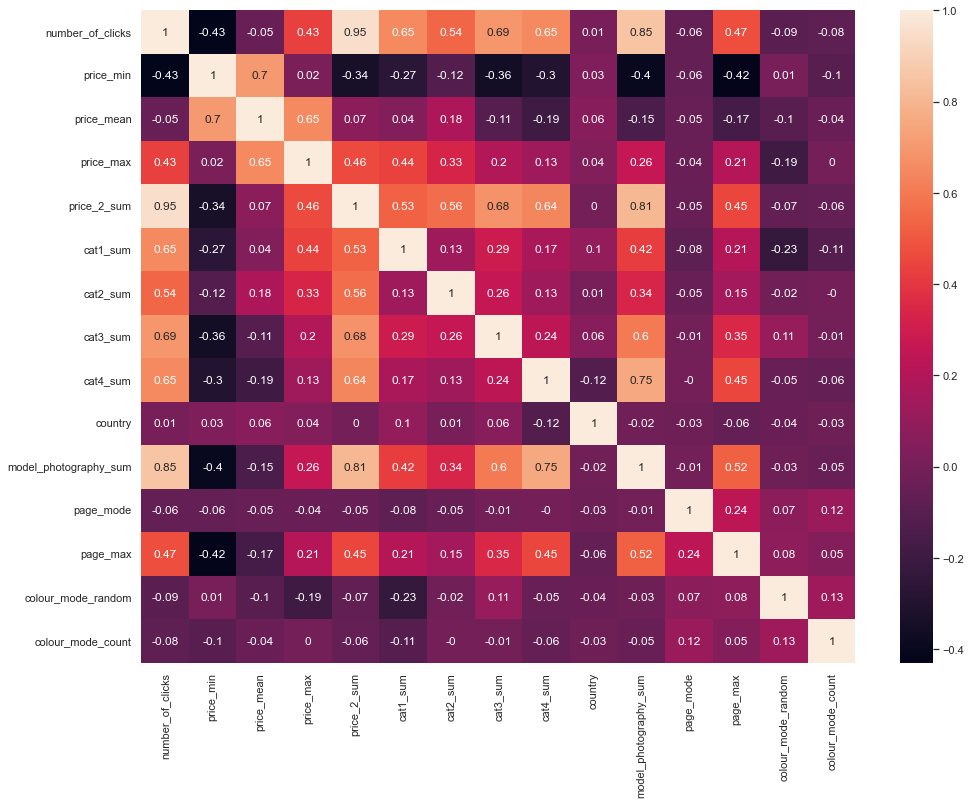

In [59]:
plt.figure(figsize=(16, 12))
sns.heatmap(df1.corr('pearson').round(2), annot=True)
plt.show()

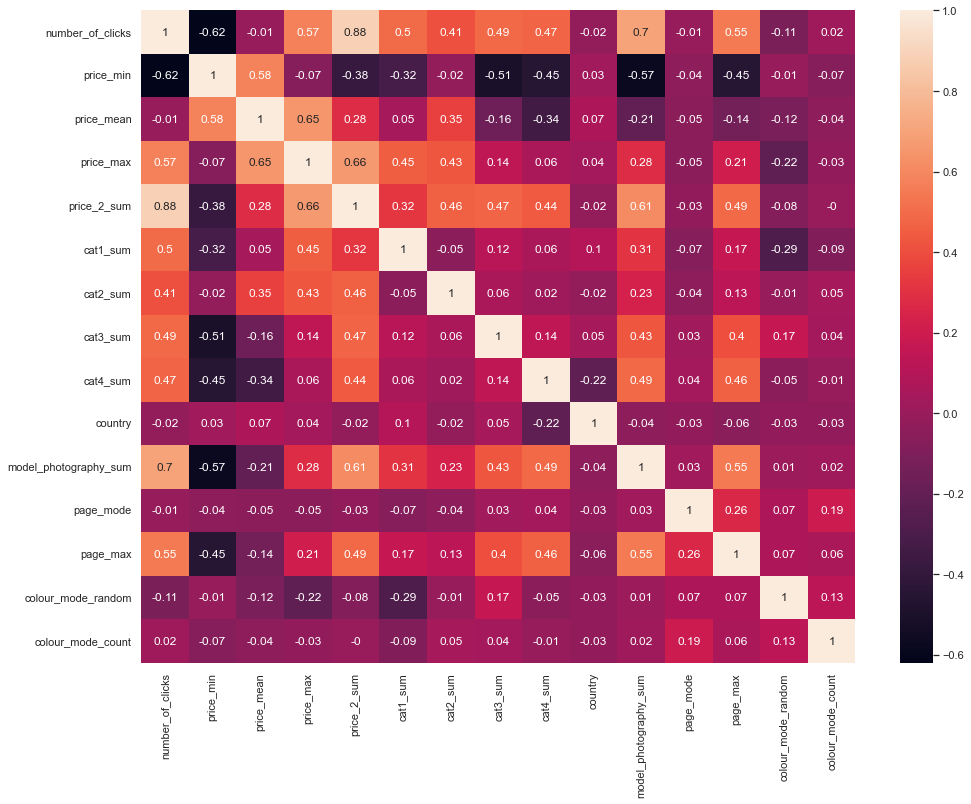

In [60]:
plt.figure(figsize=(16, 12))
sns.heatmap(df1.corr('spearman').round(2), annot=True)
plt.show()